

#**License Plate Detection and Recognition**

#### Problem Statement  
This project involves two primary tasks:  
1. Detecting the license plate in a car image.  
2. Extracting the text from the detected license plate.  

The objective is to process an input image, identify the license plate within it, and then extract the text from the identified license plate.

#### Data Description  
The dataset comprises three folders and three files:  

- **License_plate_detection_train folder**: Contains 900 car images. The corresponding file, `licplatesdetection_train.csv`, provides the bounding box coordinates for each image, along with the image names.  
- **License_plate_recognition_train folder**: Includes 900 license plate images. The file `licplaterecognition_train.csv` contains the extracted text for each license plate image.  
- **Test folder**: Contains 201 car images for testing and validation purposes.  
- **Submission file (`submission.csv`)**: This file is used to record the results after completing the tasks by including the image names and the extracted license plate text.

#### Solution  

1. **Train the YOLO Model**  
   - Use YOLO to detect license plates in images.  
   - Utilize Roboflow to train the YOLO model with the images and their corresponding bounding box annotations.

2. **Detect and Resize License Plates**  
   - After detecting the license plate, crop and resize the image based on the bounding box values.  

3. **Extract Text from License Plates**  
   - Use simple OCR libraries or pretrained OCR models from Hugging Face to extract text from the resized license plate images.  

4. **Create a Processing Pipeline**  
   - Develop a pipeline that performs the following sequentially:  
     - Takes an image as input.  
     - Detects the license plate using the YOLO model.  
     - Crops and resizes the detected license plate using the bounding box values.  
     - Extracts text from the resized license plate image using OCR.  

5. **Text Post-Processing**  
   - Apply custom preprocessing to clean and refine the extracted text for accuracy and consistency.  

Link: https://drive.google.com/drive/folders/1K6gGbVGjkjQFtGBQ2YJEYHlB8C1Z9F3U?usp=drive_link


## **Import basic Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import cv2
import os


import json
from PIL import Image

!pip install roboflow


## **mount the google drive for dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# save the license plate detection train folder path into the car_images_path
car_images_path = '/content/drive/MyDrive/License Plate detection and recoginzation/license_plates_detection_train'


# read 10 images from the detection train folder and print the shape of each image.
count=0
for image_file in os.listdir(car_images_path):
    image_path = os.path.join(car_images_path, image_file)
    image = cv2.imread(image_path)
    print(image.shape)
    if(count>10):
      break
    count+=1

#store the image files in the license plate detection trian folder into list
car_images_files = os.listdir(car_images_path)
# print number of images in the folder
print(len(car_images_files))
#sort the list
car_images_files.sort()
#print the images name in the folder
print(car_images_files)

(486, 290, 3)
(547, 729, 3)
(485, 729, 3)
(547, 729, 3)
(299, 399, 3)
(547, 729, 3)
(499, 307, 3)
(547, 732, 3)
(547, 410, 3)
(476, 850, 3)
(478, 850, 3)
(546, 410, 3)
900
['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '14.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '15.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', 

In [ ]:
# read the licplatesdetection_train.csv file and display 10 row in the dataset
bounding_boxes=pd.read_csv('/content/drive/MyDrive/License Plate detection and recoginzation/Licplatesdetection_train.csv')
bounding_boxes.head(10)

,img_id,ymin,xmin,ymax,xmax
0,1.jpg,276,94,326,169
1,10.jpg,311,395,344,444
2,100.jpg,406,263,450,434
3,101.jpg,283,363,315,494
4,102.jpg,139,42,280,222
5,103.jpg,437,320,475,450
6,104.jpg,482,511,547,623
7,105.jpg,281,452,330,535
8,106.jpg,309,172,332,281
9,107.jpg,399,328,425,441


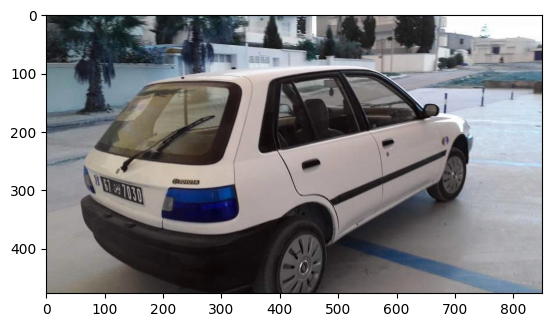

In [ ]:
#display the sample car image
img=cv2.imread(os.path.join(car_images_path,car_images_files[0]))
plt.imshow(img)

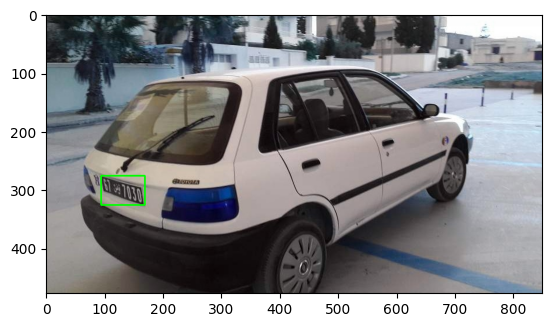

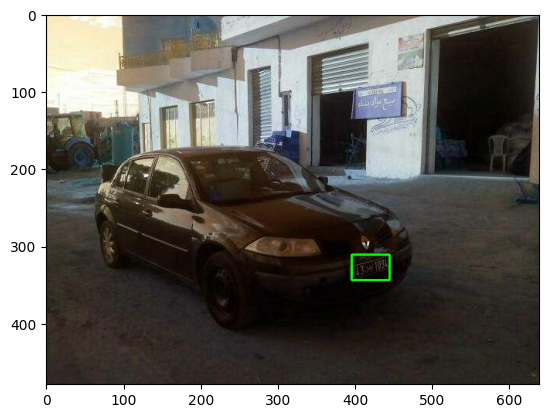

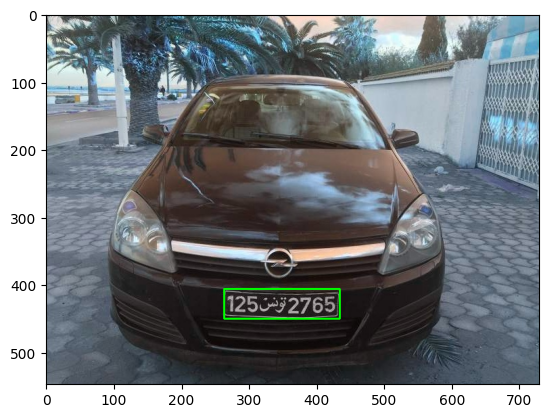

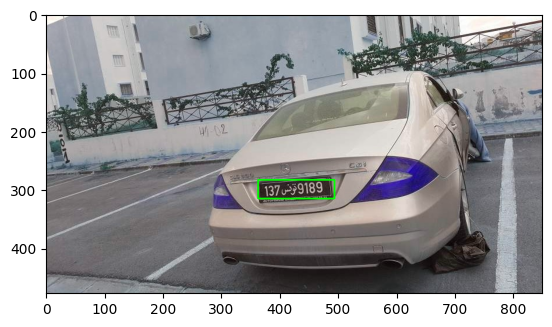

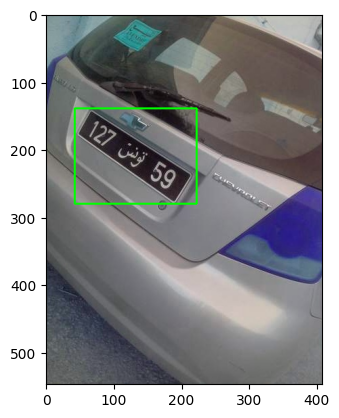

In [ ]:
#display the bounding box on the image with repesctive image file
for i in range(0,5):
    image_file = bounding_boxes.iloc[i, 0]
    x1 = bounding_boxes.iloc[i, 1]
    y1 = bounding_boxes.iloc[i, 2]
    x2 = bounding_boxes.iloc[i, 3]
    y2 = bounding_boxes.iloc[i, 4]
    image = cv2.imread(os.path.join(car_images_path, image_file))
    cv2.rectangle(image, (y1,x1), (y2,x2), (0, 255, 0), 2)
    plt.imshow(image)
    plt.show()

Install the necessary libraries for Yolo Model
- 'ultralytics' for Yolov8 model
- 'roboflow' for train the yolov8 model and  import the trained yolo model into our system

In [ ]:
!pip install ultralytics
!pip install roboflow

from ultralytics import YOLO

from IPython.display import display, Image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.0/950.0 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

Imoport the roboflow
import the our train model in the roboflow with API key and model version

# **Data Preprocessing**

- Using Roboflow tools  all the data preprocessing steps are done.
- 1.Resize image with 640*640
- 2.Remove the image with full blurr.
- 3.Data agumention like fliping, rotation and zooming of images.

In [ ]:
# import our workspace in the Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="Fe5oUO0k6dKc9tin4kyw")
project = rf.workspace("mldl-i6z0f").project("license-plate-recoginzation")
version = project.version(1).model

loading Roboflow workspace...
loading Roboflow project...


License Plate Detection

In [ ]:
#test the yolo model to give car image and store the result int the 'result.png'
version.predict("/content/drive/MyDrive/License Plate detection and recoginzation/license_plates_detection_train/100.jpg",confidence=50,overlap=30).save("/content/result.jpg")


In [ ]:
#save the json file return by yolo model of object detected in the image.
js=version.predict("/content/drive/MyDrive/License Plate detection and recoginzation/license_plates_detection_train/100.jpg",confidence=50,overlap=30).json()

In [ ]:
print(js)
js

{'predictions': [{'x': 347, 'y': 428, 'width': 173, 'height': 43, 'confidence': 0.963097870349884, 'class': 'Number plate', 'class_id': 0, 'detection_id': '352cc5e5-e78d-4a10-b741-232fb6d1e356', 'image_path': '/content/drive/MyDrive/License Plate detection and recoginzation/license_plates_detection_train/100.jpg', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '729', 'height': '547'}}


{'predictions': [{'x': 347,
   'y': 428,
   'width': 173,
   'height': 43,
   'confidence': 0.963097870349884,
   'class': 'Number plate',
   'class_id': 0,
   'detection_id': '352cc5e5-e78d-4a10-b741-232fb6d1e356',
   'image_path': '/content/drive/MyDrive/License Plate detection and recoginzation/license_plates_detection_train/100.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '729', 'height': '547'}}

In [ ]:
#bouding box funtion take the json file as the input and reutrn (x,y) coordinates,width and height of object detectdd bounging box
def bounding_box(json_file):

  image_width = int(json_file['image']['width'])
  image_height = int(json_file['image']['height'])
  image = np.zeros((image_height, image_width, 3), dtype=np.uint8)

  # Bounding box parameters
  x_center = json_file['predictions'][0]['x']
  y_center = json_file['predictions'][0]['y']
  box_width = json_file['predictions'][0]['width']
  box_height = json_file['predictions'][0]['height']

  # Calculate top-left and bottom-right coordinates
  x1 = int(x_center - box_width / 2)
  y1 = int(y_center - box_height / 2)
  x2 = int(x_center + box_width / 2)
  y2 = int(y_center + box_height / 2)

  return x1,x2,y1,y2,box_width,box_height



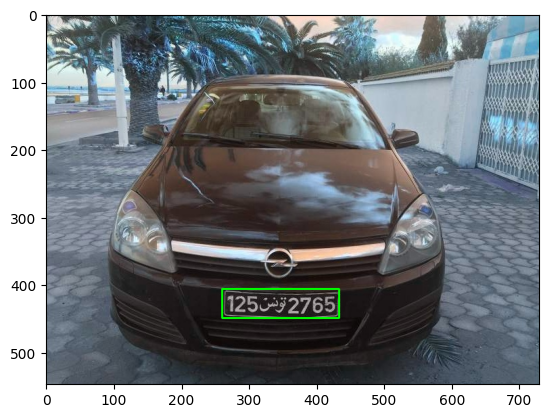

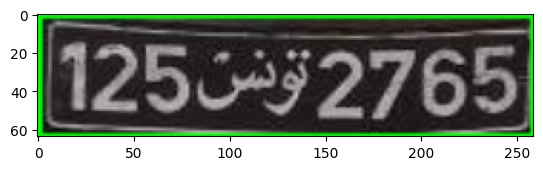

In [ ]:
# take sample car image and detect the license plate and resize the image with bounding box
image=cv2.imread("/content/drive/MyDrive/License Plate detection and recoginzation/license_plates_detection_train/100.jpg")

x1,x2,y1,y2,new_width,new_height=bounding_box(js)
# Draw the bounding box
cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the image with the bounding box
plt.imshow(image)
plt.show()
crop = image[y1:y2, x1:x2]

# Resize the image
new_width=int(new_width*1.5)
new_height=int(new_height*1.5)
resized_img = cv2.resize(crop, (new_width,new_height))

plt.imshow(resized_img)
plt.show()


In [ ]:
# detect funtion take the image and yolo model as the input and return the detected image and resize image

def detect(img,model):
  # read the image
  image=cv2.imread(img)

  pred_json=model.predict(image,confidence=50,overlap=30).json()
  #if the object is not detect then return original image
  if(pred_json['predictions']==[]):
    return image,image

  x1,x2,y1,y2,width,height=bounding_box(pred_json)

  #draw the bounding box
  cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

  #crop the image with bouding box
  crop = image[y1:y2, x1:x2]

  # Resize the image
  new_width=int(width*1.5)
  new_height=int(height*1.5)
  resized_img = cv2.resize(crop, (new_width,new_height))


  return image,resized_img

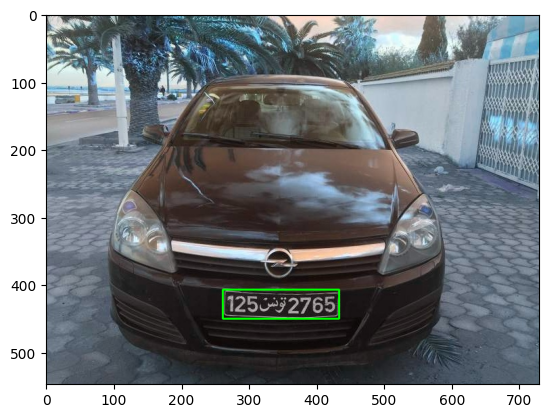

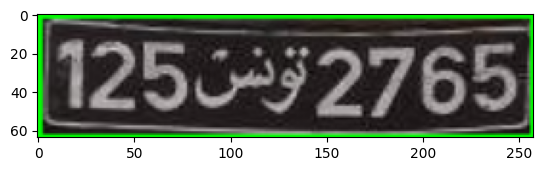

In [ ]:
img='/content/drive/MyDrive/License Plate detection and recoginzation/license_plates_detection_train/100.jpg'
img1,img2=detect(img,version)
plt.imshow(img1)
plt.show()
plt.imshow(img2)
plt.show()

# **Text Recognition**

In [ ]:
# import the trained ocr models from huggingface using the transformers

from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import torch



In [ ]:
#import the tessorocr pretrained model of microsoft and load the model with encoder and decoder
model_name = "microsoft/trocr-base-printed"
processor = TrOCRProcessor.from_pretrained(model_name)
model = VisionEncoderDecoderModel.from_pretrained(model_name)



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.50, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.13k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# extract_text function take license plate image and extract the text from the image using the OCR
def extract_text(img):


  # Process the image and prepare for model
  pixel_values = processor(images=img, return_tensors="pt").pixel_values

  # Move to GPU if available
  device = "cuda" if torch.cuda.is_available() else "cpu"
  model.to(device)
  pixel_values = pixel_values.to(device)

  # Generate text from the image
  generated_ids = model.generate(pixel_values)
  extracted_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]


  return extracted_text

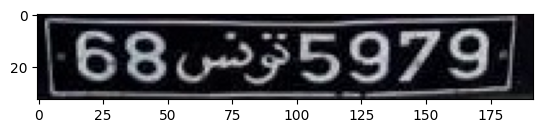

68-559791


In [ ]:
# take sample license plate image fromt the license plate recognition folder and preform text extraction
imgg=cv2.imread('/content/drive/MyDrive/License Plate detection and recoginzation/license_plates_recognition_train/101.jpg',1)
plt.imshow(imgg)
plt.show()
print(extract_text(imgg))

## **Data Analysis and Understanding**
#### Observation

- The license Plate are belonging to the Tunisia country in North Africa
- The license Plate have arabic or some other language words at the middle of plate.
- Before the arabic words there are 2 or 3 digits at most.
- After the arabic word there are 3 or 4 digits at the end of the License Plate.
- As the per the dataset the middle arabic letter is 'T'.

In [ ]:
# read the licplaterecognition_train file.csv file
plates_df=pd.read_csv("/content/drive/MyDrive/License Plate detection and recoginzation/Licplatesrecognition_train.csv")
plates_df.head()

,img_id,text,extracted_text
0,0.jpg,117T3989,117 @ 3989
1,1.jpg,128T8086,128:8086
2,10.jpg,94T3458,9&99458
3,100.jpg,133T6719,133@J6719
4,101.jpg,68T5979,68-559791


In [ ]:
# extract_text_from_image_path function take input as the folder and return the extract text from the image in folder

def extract_text_from_image_path(image_path):
  """Extracts text from an image using TrOCR."""
  try:
    #read the image in color channel
    img = cv2.imread(image_path, 1)
    #if image is fail to load or nothing to read return empty string
    if img is None:
      return ""
    #other return extracted text
    return extract_text(img)
  except Exception as e:
    print(f"Error processing image {image_path}: {e}")
    return ""


In [ ]:

# add a column to licplaterecognition_train.csv to extract text from the images
plates_df['extracted_text'] = ""


# Iterate through the rows in the CSV and extract text for each image
for index, row in plates_df.iterrows():
  image_path = os.path.join('/content/drive/MyDrive/License Plate detection and recoginzation/license_plates_recognition_train', row['img_id'])
  extracted_text = extract_text_from_image_path(image_path)
  plates_df.at[index, 'extracted_text'] = extracted_text

# Save the updated DataFrame back to the CSV
plates_df.to_csv("/content/drive/MyDrive/License Plate detection and recoginzation/Licplatesrecognition_train.csv", index=False)

print("Text extraction completed.")

Text extraction completed.


In [ ]:
# extract_nums function return the number only in the text, search the index from and start and end where the numbers start.
def extract_nums(text):
  start=0
  end=0
  for i in range(len(text)):
    if(text[i].isdigit()):
      start=i
      break
  for i in range(len(text)-1,-1,-1):
    if(text[i].isdigit()):
      end=i
      break
  return text[start:end+1]

# split the text if the middle of the text is special character or space because ocr detect the arabic as the special characters.
# most of the starting numbers of the text is 3 if the starting number more than 3 then take staring 3 number only for text.
def specific_1(text):
  if len(text)>3:
    return text[0:3]
  else:
    return text

# most of the license_plate ending numbers are 4 only , if the last numbers are more than 4 then take the last 4 number from the text only.
def specific_2(text):
  if len(text)>4:
    return text[len(text)-4:len(text)]
  else:
    return text

In [ ]:
# preprocess the extracted text from the ocr model.

# By the analysis the license plate starting text have 2 or 3 digits, after that arabic or urdu words are there.
# after the urudu word 3 or 4 digits in the text.
import re
def preprocess_text(text):
  # find the starting and ending index of digits in the text and replace text with text where digits start and digits end
  text=extract_nums(text)
  # text=text[start:end+1]
  #split the text with space because the ocr detect the arabic with in the spaces.
  li=text.split(" ")
  # if the text have white space at the middle replace the whitespace with 'T' and return the text
  if(len(li)>1):
    li[0]=specific_1(li[0])   #take starting 2 or 3 digits in the text
    li[len(li)-1]=specific_2(li[len(li)-1])  # take last 4 digits only/
    # print(li)
    li[0]=extract_nums(li[0]).replace(".","")  # replace the '.' with space becasue ocr detect the some '.'s.
    li[len(li)-1]=extract_nums(li[len(li)-1]).replace(".","")
    text=li[0]+'T'+li[len(li)-1]
    return text
    # if the text doesn't contain the whitespaces then findout the character other than digits.
  elif(len(li)==1):
    list2=re.split(r"[^0-9]",li[0]) # split the text where the character other than digits.
    if(len(list2)==1):   # if no special character found then take staring 3 digits add "T" and add last 4 digits.
      if(len(list2[0])>6):
        return list2[0][:3]+"T"+list2[0][-4:]
      else:
        return list2[0][:2]+"T"+list2[0][-2:]
    else:    # if the special characters found extracts the digits only.
      list2[0]=specific_1(list2[0])
      list2[len(list2)-1]=specific_2(list2[len(list2)-1])
      # print(list2)
      list2[0]=extract_nums(list2[0]).replace(".","")
      list2[len(list2)-1]=extract_nums(list2[len(list2)-1]).replace(".","")
      text=list2[0]+'T'+list2[len(list2)-1]
      return text
  return text


In [ ]:
plates_df.head()

,img_id,text,extracted_text
0,0.jpg,117T3989,117 @ 3989
1,1.jpg,128T8086,128:8086
2,10.jpg,94T3458,9&99458
3,100.jpg,133T6719,133@J6719
4,101.jpg,68T5979,68-559791


In [ ]:
# preprocess the extracted text from the images.
plates_df['preprocess_extracted_text']=plates_df['extracted_text'].apply(preprocess_text)

In [ ]:
plates_df.head(50)

,img_id,text,extracted_text,preprocess_extracted_text
0,0.jpg,117T3989,117 @ 3989,117T3989
1,1.jpg,128T8086,128:8086,128T8086
2,10.jpg,94T3458,9&99458,9T9458
3,100.jpg,133T6719,133@J6719,133T6719
4,101.jpg,68T5979,68-559791,68T9791
5,102.jpg,106T2131,106 3% 2131-,106T2131
6,103.jpg,117T2600,117 @ 2600,117T2600
7,104.jpg,58T8888,58 - 8888,58T8888
8,105.jpg,93T5599,93.5599,93T5599
9,106.jpg,155T1216,(155@1216],155T1216


In [ ]:
# save the preprocessed text into the same csv file

plates_df.to_csv("/content/drive/MyDrive/License Plate detection and recoginzation/Licplatesrecognition_train_with_text_preprocess.csv", index=False)


# **Model Building**

In [ ]:
# workflow take the image_path, detect the license plate from the image, resize the image, extract the texta and preprocess the text.
def work_flow(image_path):

  image,cropped_image=detect(image_path,version)

  text=extract_text(cropped_image)

  text=preprocess_text(text)

  return text



In [ ]:
# testing the sample test image whether the workflow is working well or not.

work_flow("/content/drive/MyDrive/License Plate detection and recoginzation/test/test/1001.jpg")

'173T9116'

In [ ]:
# create a csv with image names in the test folder and path of test images
def create_csv_for_test(image_folder_path, csv_file_path):
  """Creates a CSV file with image name, path, and extracted text."""

  data = []
  for image_file in os.listdir(image_folder_path):
    image_path = os.path.join(image_folder_path, image_file)
    #fill the extracted text column with empty string
    extracted_text = ""  # Placeholder for text extraction
    #create the column imagefile and image path and save the each image file in the test folder
    data.append([image_file, image_path,extracted_text])

  df = pd.DataFrame(data, columns=['img_file', 'image_path',"extracted_text"])
  df.to_csv(csv_file_path, index=False)
  print(f"CSV file created at: {csv_file_path}")


# input as the test folder and csv file path
image_folder = "/content/drive/MyDrive/License Plate detection and recoginzation/test/test"
csv_file = "/content/drive/MyDrive/License Plate detection and recoginzation/test_images.csv"

create_csv_for_test(image_folder, csv_file)

CSV file created at: /content/drive/MyDrive/License Plate detection and recoginzation/test_images.csv


In [ ]:
# read the test_images csv file and display the dataframe
df=pd.read_csv("/content/drive/MyDrive/License Plate detection and recoginzation/test_images.csv")
df.head(20)


,img_file,image_path,extracted_text
0,1101.jpg,/content/drive/MyDrive/License Plate detection...,NaN
1,1070.jpg,/content/drive/MyDrive/License Plate detection...,NaN
2,1073.jpg,/content/drive/MyDrive/License Plate detection...,NaN
3,1103.jpg,/content/drive/MyDrive/License Plate detection...,NaN
4,1095.jpg,/content/drive/MyDrive/License Plate detection...,NaN
5,1088.jpg,/content/drive/MyDrive/License Plate detection...,NaN
6,1087.jpg,/content/drive/MyDrive/License Plate detection...,NaN
7,1046.jpg,/content/drive/MyDrive/License Plate detection...,NaN
8,1081.jpg,/content/drive/MyDrive/License Plate detection...,NaN
9,1090.jpg,/content/drive/MyDrive/License Plate detection...,NaN


In [ ]:
# iterate the each image in the test folder using the test_image.csv and extract the text from each image and save the text in the csv file.
for index, row in df.iterrows():
  image_path = os.path.join('/content/drive/MyDrive/License Plate detection and recoginzation/test/test', row['img_file'])
  extracted_text = work_flow(image_path)
  df.at[index, 'extracted_text'] = extracted_text

# Save the updated DataFrame back to the CSV
df.to_csv("/content/drive/MyDrive/License Plate detection and recoginzation/test_images.csv", index=False)

print("Text extraction complete. Updated CSV saved.")

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '80T3044' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


Text extraction complete. Updated CSV saved.


In [ ]:
df.head(10)

,img_file,image_path,extracted_text
0,1101.jpg,/content/drive/MyDrive/License Plate detection...,80T3044
1,1070.jpg,/content/drive/MyDrive/License Plate detection...,177T2854
2,1073.jpg,/content/drive/MyDrive/License Plate detection...,94T573
3,1103.jpg,/content/drive/MyDrive/License Plate detection...,188T7083
4,1095.jpg,/content/drive/MyDrive/License Plate detection...,86T4855
5,1088.jpg,/content/drive/MyDrive/License Plate detection...,92T85
6,1087.jpg,/content/drive/MyDrive/License Plate detection...,135T5332
7,1046.jpg,/content/drive/MyDrive/License Plate detection...,181T3690
8,1081.jpg,/content/drive/MyDrive/License Plate detection...,117T91
9,1090.jpg,/content/drive/MyDrive/License Plate detection...,131T870


In [ ]:
# read the submission csv file
sample_csv=pd.read_csv('/content/drive/MyDrive/License Plate detection and recoginzation/SampleSubmission.csv')
sample_csv.head(10)

,id,0,1,2,3,4,5,6,7,8,9
0,img_901_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,img_901_2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,img_901_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,img_901_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,img_901_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,img_901_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,img_901_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,img_902_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,img_902_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,img_902_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sample_csv.head(10)

,id,0,1,2,3,4,5,6,7,8,9
0,img_901_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,img_901_2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,img_901_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,img_901_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,img_901_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,img_901_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,img_901_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,img_902_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,img_902_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,img_902_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

# Load the samplesubmission file and test images CSV
sample_submission = pd.read_csv('/content/drive/MyDrive/License Plate detection and recoginzation/SampleSubmission.csv')
test_images = pd.read_csv('/content/drive/MyDrive/License Plate detection and recoginzation/test_images.csv')

# fill the null values in the sample_submission file with 0
sample_submission.fillna(0,inplace=True)
# Iterate through the rows in the test images CSV
for index, row in test_images.iterrows():
  # save the image file
  img_file = row['img_file']
  # save the extracted text corresponding the image file
  extracted_text = row['extracted_text']

  # split the extracted text with 'T' and join the list
  text_list=extracted_text.split("T")
  text=text_list[0]+text_list[1]

  # Find the corresponding row in the sample submission file based on image name
  img_id = int(img_file.split('.')[0])  # Extract the image ID (e.g., 910 from 910.jpg
  # iterate each character in the string
  for i in range(len(text)):
    # if the character is not digit then skip
    if not text[i].isdigit():
      continue
    # find the row in sample submission with image file in the text Image
    row = sample_submission[sample_submission['id'] == f'img_{img_id}_{i+1}']
    if not row.empty:
      # place value 1 in the character value of text in index into the row with image_file_indexofcharacter
      sample_submission.loc[row.index, f'{text[i]}'] = 1





In [ ]:
sample_submission.head(50)

,id,0,1,2,3,4,5,6,7,8,9
0,img_901_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,img_901_2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,img_901_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,img_901_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,img_901_5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,img_901_6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,img_901_7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,img_902_1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,img_902_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,img_902_3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
# save the sample_submission file into the submissiont_results.csv file
sample_submission.to_csv("/content/drive/MyDrive/License Plate detection and recoginzation/submission_results.csv", index=False)

### **Conclusion**

- License plate detection was achieved using the YOLO model, trained with the help of the Roboflow tool.  
- Text extraction from the detected license plates was performed using the TROCR pre-trained model from Hugging Face.  
- The YOLO model successfully detected license plates in 90% of the images, demonstrating strong performance in object detection.  
- However, many extracted texts required preprocessing, as the license plates often contained foreign language characters that were not accurately detected.  
- The key takeaway is that while object detection is robust, text extraction and preprocessing present significant challenges, particularly for license plates with non-standard or foreign language characters.  